# Multiple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [ ]:
dataset['State'].value_counts()

,count
State,
New York,17
California,17
Florida,16


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
print(X_train)

[[0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [1.0 0.0 0.0 0.0 116983.8 45173.06]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 44069.95 51283.14 197029.42]
 [0.0 0.0 1.0 77044.01 99281.34 140574.81]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 0.0 28663.76 127056.21 201126.82]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()   #build the model
regressor.fit(X_train, y_train)   #fitting the model

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)  #test the model on x_test - never seen before -
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[110086.01 103282.38]
 [134506.26 144259.4 ]
 [141700.34 146121.95]
 [ 76548.14  77798.83]
 [189440.99 191050.39]
 [111040.2  105008.31]
 [ 61804.42  81229.06]
 [ 96350.05  97483.56]
 [119733.03 110352.25]
 [178648.39 166187.94]
 [101589.35  96778.92]
 [ 84652.39  96479.51]
 [117583.5  105733.54]
 [ 88651.8   96712.8 ]
 [134537.25 124266.9 ]
 [168723.33 155752.6 ]
 [158622.37 132602.65]
 [ 42525.7   64926.08]
 [ 40636.56  35673.41]
 [100588.77 101004.64]]


In [ ]:
#evaluation
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
r2=r2_score(y_test, y_pred)
mse=mse(y_test, y_pred)
mae=mae(y_test, y_pred)
print(r2)
print(mse)
print(mae)
rmse=np.sqrt(mse)
print(rmse)

0.8942500510196078
133455781.33753438
9292.921904963136
11552.3063211436


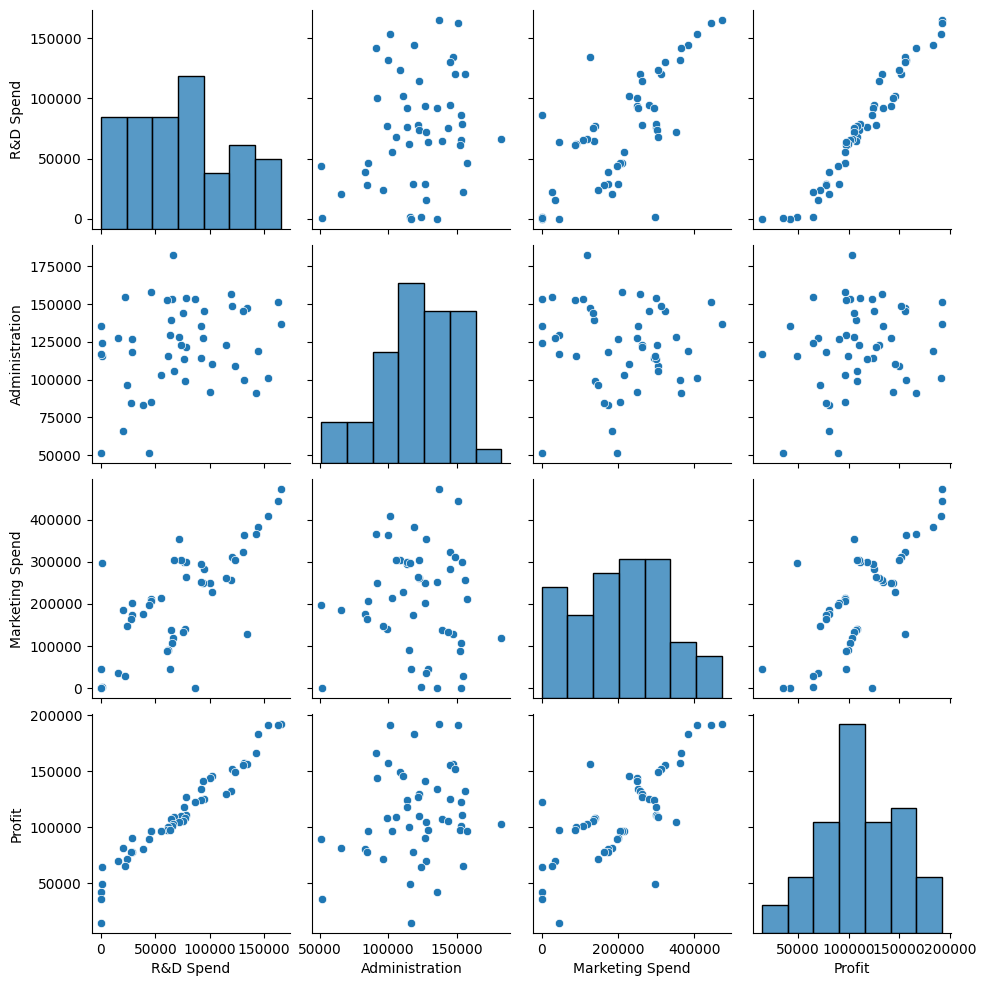

In [ ]:
import seaborn as sns
sns.pairplot(dataset)

In [ ]:
# view the correlation between features
X=pd.DataFrame(X)
corr=X.corr()
corr

,0,1,2,3,4,5
0,1.000000,-0.492366,-0.515152,-0.143165,-0.015478,-0.168875
1,-0.492366,1.000000,-0.492366,0.105711,0.010493,0.205685
2,-0.515152,-0.492366,1.000000,0.039068,0.005145,-0.033670
3,-0.143165,0.105711,0.039068,1.000000,0.241955,0.724248
4,-0.015478,0.010493,0.005145,0.241955,1.000000,-0.032154
5,-0.168875,0.205685,-0.033670,0.724248,-0.032154,1.000000


<Axes: >

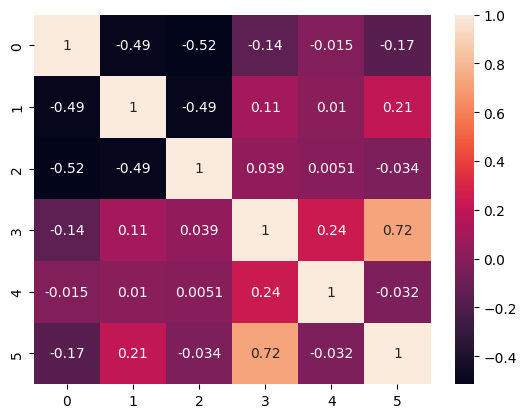

In [ ]:
#heatmap
sns.heatmap(corr,annot=True)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,:]=sc.fit_transform(X_train[:,:])
X_test[:,:]=sc.transform(X_test[:,:])


In [ ]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
#tranform the features
poly_reg=PolynomialFeatures(degree=4)

X_poly_train=poly_reg.fit_transform(X_train)
X_poly_test=poly_reg.transform(X_test)     # test portion after polynomial tansformtion

#build the model
lin_reg_2=LinearRegression()
#fit the model
lin_reg_2.fit(X_poly_train,y_train)


LinearRegression()

In [ ]:
# predict
y_pred2=lin_reg_2.predict(X_poly_test)

In [ ]:
#Evaluation
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
import numpy as np
r2=r2_score(y_test, y_pred2)
mse=mse(y_test, y_pred2)
mae=mae(y_test, y_pred2)
print(r2)
print(mse)
print(mae)
print(np.sqrt(mse))

-18.190924338956812
24218827781.37191
59313.73327154828
155623.9948766639


The results (r2=-1.25) shows a severe failure

In [ ]:
#evaluate training
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae

y_pred3=lin_reg_2.predict(X_poly_train)
r2=r2_score(y_train, y_pred3)
mse=mse(y_train, y_pred3)
mae=mae(y_train, y_pred3)
print(r2)
print(mse)
print(mae)

1.0
9.390705767443672e-21
7.027362395698825e-11


R2 is 100%  i.e. model could accurately detect the pattern in raining part. But fails i test part. THis is overfitting. This means that the model has high variance.

We can fix the overfitting by:<p>
1- Degree =2 - We got R2=64% -<p>
2- Regularizatio methods (lasso, Ridge): these mothods make the model more general

In [ ]:
# lasso regression model
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.5)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.5)

In [ ]:
#evalaute lasso
y_pred4=lasso_reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
r2=r2_score(y_test, y_pred4)
mse=mse(y_test, y_pred4)
mae=mae(y_test, y_pred4)
print(r2)
print(mse)
print(mae)

0.8942609136143337
133442072.8101972
9292.493057085303


In [ ]:
#Ridge
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.01, max_iter=1000)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.01, max_iter=1000)

In [ ]:
#evaluate
y_pred5=ridge_reg.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae

r2=r2_score(y_test, y_pred5)
mse=mse(y_test, y_pred5)
mae=mae(y_test, y_pred5)
print(r2)
print(mse)
print(mae)

0.8945392465042341
133090818.42519054
9285.06926169558
